In [2]:
with open('/content/word_pred.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [5]:
tokenizer.word_index

{'i': 1,
 'you': 2,
 'to': 3,
 'the': 4,
 'a': 5,
 'it': 6,
 'of': 7,
 'and': 8,
 'is': 9,
 'do': 10,
 'that': 11,
 'in': 12,
 'what': 13,
 'for': 14,
 'have': 15,
 'like': 16,
 'are': 17,
 "i'm": 18,
 'but': 19,
 'so': 20,
 'good': 21,
 'about': 22,
 'my': 23,
 "it's": 24,
 'hi': 25,
 'your': 26,
 'how': 27,
 'be': 28,
 'with': 29,
 'not': 30,
 'on': 31,
 'was': 32,
 '🙂': 33,
 'think': 34,
 'going': 35,
 'oh': 36,
 'just': 37,
 'haha': 38,
 'up': 39,
 'this': 40,
 'time': 41,
 'at': 42,
 'we': 43,
 'me': 44,
 'nice': 45,
 'too': 46,
 'some': 47,
 'there': 48,
 'work': 49,
 'very': 50,
 'can': 51,
 'all': 52,
 'really': 53,
 'as': 54,
 'would': 55,
 'day': 56,
 'been': 57,
 'yeah': 58,
 'lot': 59,
 "that's": 60,
 'did': 61,
 'fun': 62,
 'any': 63,
 'great': 64,
 'yes': 65,
 'will': 66,
 'pretty': 67,
 'well': 68,
 'if': 69,
 'out': 70,
 'get': 71,
 'one': 72,
 'know': 73,
 'go': 74,
 'they': 75,
 "don't": 76,
 'or': 77,
 'more': 78,
 'cool': 79,
 'from': 80,
 'no': 81,
 'am': 82,
 'muc

In [6]:
inp_seq = []
for sentence in text.split('\n'):
  tokenized_sen = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sen)):
    n_gram_seq = tokenized_sen[:i+1]
    inp_seq.append(n_gram_seq)

splited sentences then added them to list and then tokenized them


In [7]:

maxi_len = max([len(x) for x in inp_seq])

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_inp_seq = pad_sequences(inp_seq,maxlen=maxi_len,padding='pre')

In [9]:
x = pad_inp_seq[::-1]

In [10]:
y = pad_inp_seq[:,-1]

In [11]:
x[0].shape

(151,)

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=len(tokenizer.word_index)+1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding ,LSTM,Dense

In [14]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=100))
model.add(LSTM(100))
model.add(Dense(len(tokenizer.word_index)+1,activation='softmax'))

In [15]:
model.build(input_shape=(None, x.shape[1]))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 151, 100)       │       280,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2809)           │       283,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 645,009 (2.46 MB)

 Trainable params: 645,009 (2.46 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:

history = model.fit(x, y, epochs=150, batch_size=64)

Epoch 1/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1782 - loss: 4.4295
Epoch 2/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1900 - loss: 4.2878
Epoch 3/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2095 - loss: 4.1676
Epoch 4/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2163 - loss: 4.0522
Epoch 5/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2353 - loss: 3.9188
Epoch 6/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2576 - loss: 3.7933
Epoch 7/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2874 - loss: 3.6306
Epoch 8/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3048 - loss: 3.5404
Epoch 9/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3332 - loss: 3.4129
Epoch 10/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3523 - loss: 3.3064
Epoch 11/150
283/283 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3716 - loss: 3.2173
Epoch 12/150
283/283 ━━━━━━━━━

In [38]:
import numpy as np

text = "will"
for i in range(3):
  tokenized_text = tokenizer.texts_to_sequences([text])[0]
  pad_text = pad_sequences([tokenized_text],maxlen=maxi_len-1,padding='pre')

  pred = np.argmax(model.predict(pad_text))

  for word,index in tokenizer.word_index.items():
    if index == pred:
      text = text + " " + word
      print(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
will are
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
will are that
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
will are that kinds


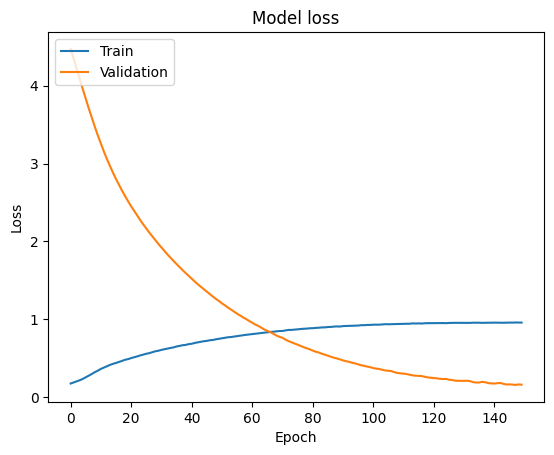

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()